# Early Prediction of Diabetes

In this project we will use datset which contains early symptoms of newly diabetic patient or patient who is already a diabetic patient to predict diabeties for paient at early stage.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
db = pd.read_csv("D:/ML_Datasets/diabetes_data_upload.csv")
print(db)

     Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0     40    Male       No        Yes                 No      Yes         No   
1     58    Male       No         No                 No      Yes         No   
2     41    Male      Yes         No                 No      Yes        Yes   
3     45    Male       No         No                Yes      Yes        Yes   
4     60    Male      Yes        Yes                Yes      Yes        Yes   
..   ...     ...      ...        ...                ...      ...        ...   
515   39  Female      Yes        Yes                Yes       No        Yes   
516   48  Female      Yes        Yes                Yes      Yes        Yes   
517   58  Female      Yes        Yes                Yes      Yes        Yes   
518   32  Female       No         No                 No      Yes         No   
519   42    Male       No         No                 No       No         No   

    Genital thrush visual blurring Itching Irritabi

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## One-Hot Encoding

In above dataset we can see we have categorical dataset which contains 'Yes' and 'No' values.
As we know Machine learning model can't process categorical data sp let's use one-hot encoding technique to encode this categorical variable into integers.

In [4]:
db_new = pd.get_dummies(db, columns=['Gender','Polyuria','Polydipsia','sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush','visual blurring', 'Itching','Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity'])
print(db_new)

     Age     class  Gender_Female  Gender_Male  Polyuria_No  Polyuria_Yes  \
0     40  Positive              0            1            1             0   
1     58  Positive              0            1            1             0   
2     41  Positive              0            1            0             1   
3     45  Positive              0            1            1             0   
4     60  Positive              0            1            0             1   
..   ...       ...            ...          ...          ...           ...   
515   39  Positive              1            0            0             1   
516   48  Positive              1            0            0             1   
517   58  Positive              1            0            0             1   
518   32  Negative              1            0            1             0   
519   42  Negative              0            1            1             0   

     Polydipsia_No  Polydipsia_Yes  sudden weight loss_No  \
0             

# Labelclass Encoder

Now we have numeric values for all categorical features except our target feature "Class".
now let's convert our target feature "Class" into integer value using Label Encoding.
The difference between onhot encoding and LabelEncoder is that it won't create separate feature for each catgorical value.

In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(["Positive", "Negative"])

print(le.classes_)

db_new['class'] = le.transform(db_new['class'])

list(le.inverse_transform([0,1]))

['Negative' 'Positive']


['Negative', 'Positive']

In [6]:
print(db_new)

     Age  class  Gender_Female  Gender_Male  Polyuria_No  Polyuria_Yes  \
0     40      1              0            1            1             0   
1     58      1              0            1            1             0   
2     41      1              0            1            0             1   
3     45      1              0            1            1             0   
4     60      1              0            1            0             1   
..   ...    ...            ...          ...          ...           ...   
515   39      1              1            0            0             1   
516   48      1              1            0            0             1   
517   58      1              1            0            0             1   
518   32      0              1            0            1             0   
519   42      0              0            1            1             0   

     Polydipsia_No  Polydipsia_Yes  sudden weight loss_No  \
0                0               1                

In above dataset we can see all feature contains numeric values but "Age" feature is having range of values betwween 10 - 90 and other features contains only 0 and 1 value.

Feature scaling is required so that all features can have similar range of values and will equally contribute in prediction.

Here we don't need to use any feature scaling as we are going to use Random forest and XG-boost algorithm for prediction.
which normaly don't require feature scaling as it splits data for homogeneity of node and doesn't have any effect on other features.

#### Now that we have completed data pre-processing let's split data into train and test dataset

In [7]:
col = pd.concat([db_new.iloc[:, 0], db_new.iloc[:, 2:-1]])
x = db_new.drop(['class'], axis=1)
y = db_new['class']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [8]:
print(x_train)

     Age  Gender_Female  Gender_Male  Polyuria_No  Polyuria_Yes  \
171   48              0            1            0             1   
34    49              0            1            0             1   
56    66              1            0            0             1   
222   40              0            1            1             0   
376   43              0            1            1             0   
..   ...            ...          ...          ...           ...   
389   53              0            1            1             0   
410   30              0            1            1             0   
474   27              0            1            1             0   
498   68              1            0            0             1   
322   64              0            1            1             0   

     Polydipsia_No  Polydipsia_Yes  sudden weight loss_No  \
171              0               1                      1   
34               0               1                      1   
56          

# Random Forest & Ada-boost Algorithm

Random forest algorithm is an ensemble learning model which  uses combination of  more than one model for prediction.

Random forest algorithm will take some random training data  and then construct decison tree for selected data.

Then it will take avarage of all decision trees vote and finally it will select ,ost voted decision as final output.


Ensemble uses 2 methods ad one of them is bagging:
1] Bagging : In Bagging method it chooses random data with replacement and create decision tree for each traning set parallely. After that it will take average of all decision trees result and it will use majority of vote as final result.

#### Random forest uses bagging method for prediction.

2] Boosting : In this method we will combine weak learners into strong learner by creating sequential model so that final model will have accurate prediction this method is known as "Boosting"

#### Ada-boost and XG-Boost algorithm uses boosting method.

In [9]:

from sklearn.ensemble import RandomForestClassifier

db_classifier = RandomForestClassifier(n_estimators=15, criterion='entropy') # n_estimator is nothig but the number of decision trees we want to use for prediction & will choose criterion as entropy for splitting data.

db_classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15)

In [10]:
train_pred = db_classifier.predict(x_train)
test_pred = db_classifier.predict(x_test)


In [11]:
train_accuracy = db_classifier.score(x_train,y_train)
print("Accuracy of the model on train data = ",train_accuracy)
# Getting the accuracy on test data
test_accuracy = db_classifier.score(x_test,y_test)
print("Accuracy of the model on validation data = ",test_accuracy)
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test,test_pred))


output = pd.DataFrame({"Actual" : y_test, "Predicted" : test_pred})
print(output)

Accuracy of the model on train data =  1.0
Accuracy of the model on validation data =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        61

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

     Actual  Predicted
257       1          1
243       0          0
326       0          0
131       1          1
173       1          1
..      ...        ...
473       0          0
378       1          1
172       1          1
435       1          1
221       0          0

[104 rows x 2 columns]


In [12]:
y_test = np.array(y_test)
y_test = y_test.flatten()
output_test = pd.DataFrame({"Actual" : y_test, "Actual category": le.inverse_transform(y_test) , "Predicted" : test_pred, "Predicted Categor": le.inverse_transform(test_pred)})
output_test

,Actual,Actual category,Predicted,Predicted Categor
0,1,Positive,1,Positive
1,1,Positive,1,Positive
2,0,Negative,0,Negative
3,1,Positive,1,Positive
4,0,Negative,0,Negative
...,...,...,...,...
99,1,Positive,1,Positive
100,1,Positive,1,Positive
101,0,Negative,0,Negative
102,1,Positive,1,Positive


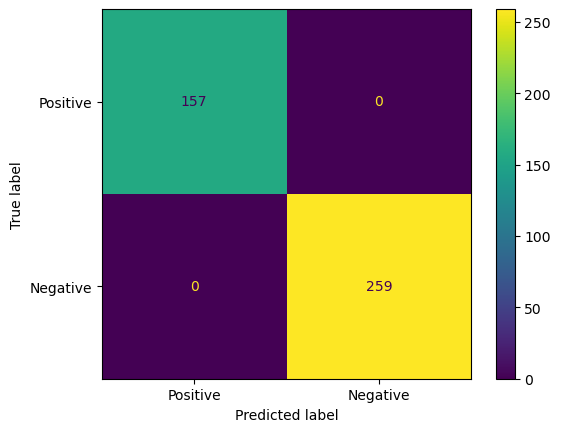

In [13]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_train, train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Positive", "Negative"])

cm_display.plot()
plt.show()

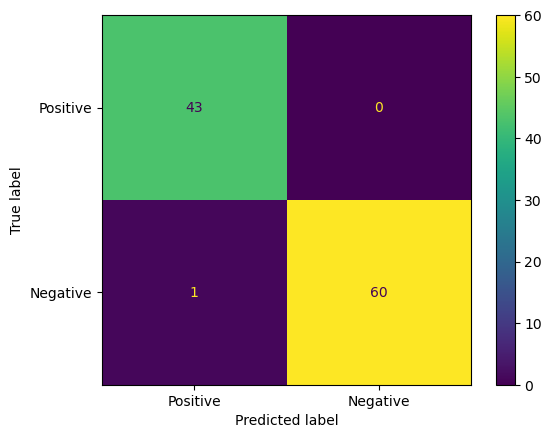

In [14]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_test, test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Positive", "Negative"])

cm_display.plot()
plt.show()

### So we can conclude from above result that Random forest algorithhm can predict accurate results

## Advantages of using Random forest algorithm

1] It can be used for predicting both catgorical and continious target variable.                                    
2] The result of algoritm is easy to understand.                                                                             
3] Provides most accurate result.


# Ada Boost Algorithm:

Ada-boost algorithm is one of the boosting algorithm. 

### How this model actually works:

In this algorithm we will create model and then assigns weight to misclassified data points. 
Then in next model will be more focuse on misclassified data points. 
This procedure will repeat till we get less error and in the end we will take average of all models.


### Mathematical Intuition:

Step 1: We will first calculate the 'stump' i.e. tree node with 1 split. We will selcet the best split by using gini and entropy.

Step 2: After that we will assign weights to each and every data points. the formula is --> 1/N where N is total no. of data points.

Step 3: After selecting Decision 'Stump' and assigning weights to each datapoint. we will identify misclassified data points and assign new weights to them but before that we need to calculate below things.

  i] Alpha : Alpha is nothing but "influece" or "importance", "Amount of say" of classifier. 
   #### α = (1/2) * log(e) ((1 - Total_error)/Total_error) 
   
   The Total_error is nothing but the summation of all the sample weights of misclassified data point. 
   
   Total_error will always be between 0 and 1. 0 error means all the data points are classified correctly and 1 means all data points are wrongly classified.
   
   After calculating Total_error and performance of stump we will calculate new weights
   
  #### New_weights = old_weight * (e^ (+/-) α)
   
   For correctly classified data ponrs we ill use - sign and for wrongly classified data we will use + sighn
   
   So that correctly  classified data will have lower weights i.e. negative value and missclassified data points will have higher weights.
   
   So that in next model we will more focus on data points which are misclassified.
   
step 4 : After calculating all the weights for each data point, we need to normalize by dividing all te weight using sum of all the weights. so that sum of all the weights of data points are 1. then we need to create buckets that is range of continious class

Step 5 : Then we will randomly choose N data points between range 0 and 1 and we will see under which bucket it falls. Based on that we will create new dataset.
 after new data set is reated we will repeat all the above steps till low training error is achieved.




https://www.analyticsvidhya.com/blog/2021/09/adaboost-algorithm-a-complete-guide-for-beginners/


In [13]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(random_state = 96)

In [14]:
clf.fit(x_train, y_train)

AdaBoostClassifier(random_state=96)

In [15]:
clf.score(x_train, y_train)

0.9423076923076923

In [16]:
train_pred1 = clf.predict(x_train)
test_pred1 = clf.predict(x_test)


In [17]:
train_accu = clf.score(x_train,y_train)
print("Accuracy of the model on train data = ",train_accu)
# Getting the accuracy on test data
test_accu = clf.score(x_test,y_test)
print("Accuracy of the model on validation data = ",test_accu)
from sklearn.metrics import classification_report
# Generating the report and printing the same
print(classification_report(y_test,test_pred))


out = pd.DataFrame({"Actual" : y_test, "Predicted" : test_pred1})
print(out)

Accuracy of the model on train data =  0.9423076923076923
Accuracy of the model on validation data =  0.9711538461538461
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        61

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

     Actual  Predicted
257       1          1
243       0          0
326       0          0
131       1          1
173       1          1
..      ...        ...
473       0          0
378       1          1
172       1          1
435       1          1
221       0          0

[104 rows x 2 columns]


In [18]:
y_test = np.array(y_test)
y_test = y_test.flatten()
output_test = pd.DataFrame({"Actual" : y_test, "Actual category": le.inverse_transform(y_test) , "Predicted" : test_pred1, "Predicted Categor": le.inverse_transform(test_pred1)})
output_test

,Actual,Actual category,Predicted,Predicted Categor
0,1,Positive,1,Positive
1,0,Negative,0,Negative
2,0,Negative,0,Negative
3,1,Positive,1,Positive
4,1,Positive,1,Positive
...,...,...,...,...
99,0,Negative,0,Negative
100,1,Positive,1,Positive
101,1,Positive,1,Positive
102,1,Positive,1,Positive


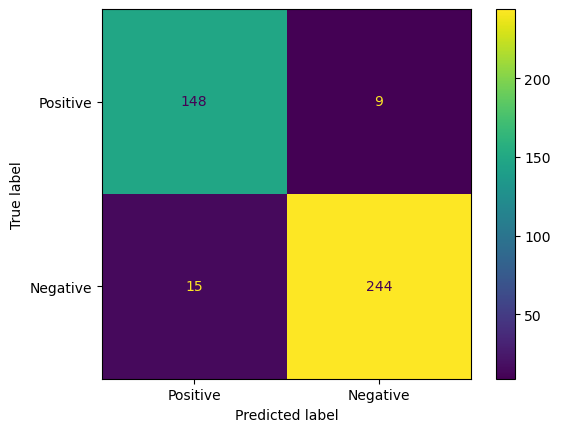

In [19]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_train, train_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Positive", "Negative"])

cm_display.plot()
plt.show()

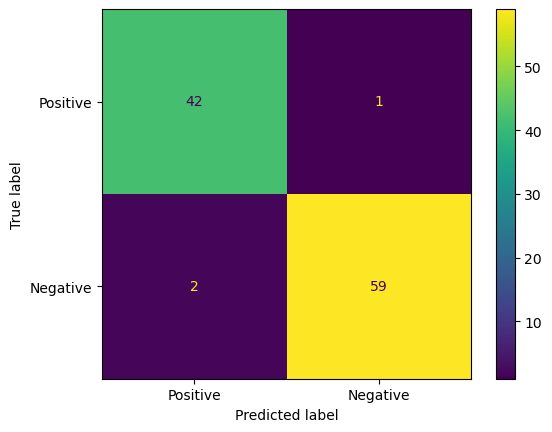

In [20]:
from sklearn import metrics

    
    
confusion_matrix = metrics.confusion_matrix(y_test, test_pred1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Positive", "Negative"])

cm_display.plot()
plt.show()